## 划分数据集

In [22]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression, Ridge, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler

In [23]:
data = pd.read_csv('insurance_data_preprocessed.csv')

In [ ]:
X = data.drop('annual_medical_cost', axis=1)
X = X.drop(['avg_claim_amount', 'total_claims_paid'], axis=1, errors='ignore')
y = data['annual_medical_cost']
#
flag_standard = False # 是否标准化特征
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=66)

Feature correlations with annual_medical_cost (sorted):
monthly_premium              0.965337
annual_premium               0.965337
risk_score                   0.304500
chronic_count                0.294810
is_high_risk                 0.249887
                               ...   
provider_quality            -0.003952
employment_status_Retired   -0.004191
region_East                 -0.004323
education                   -0.004434
income                      -0.006051
Length: 61, dtype: float64


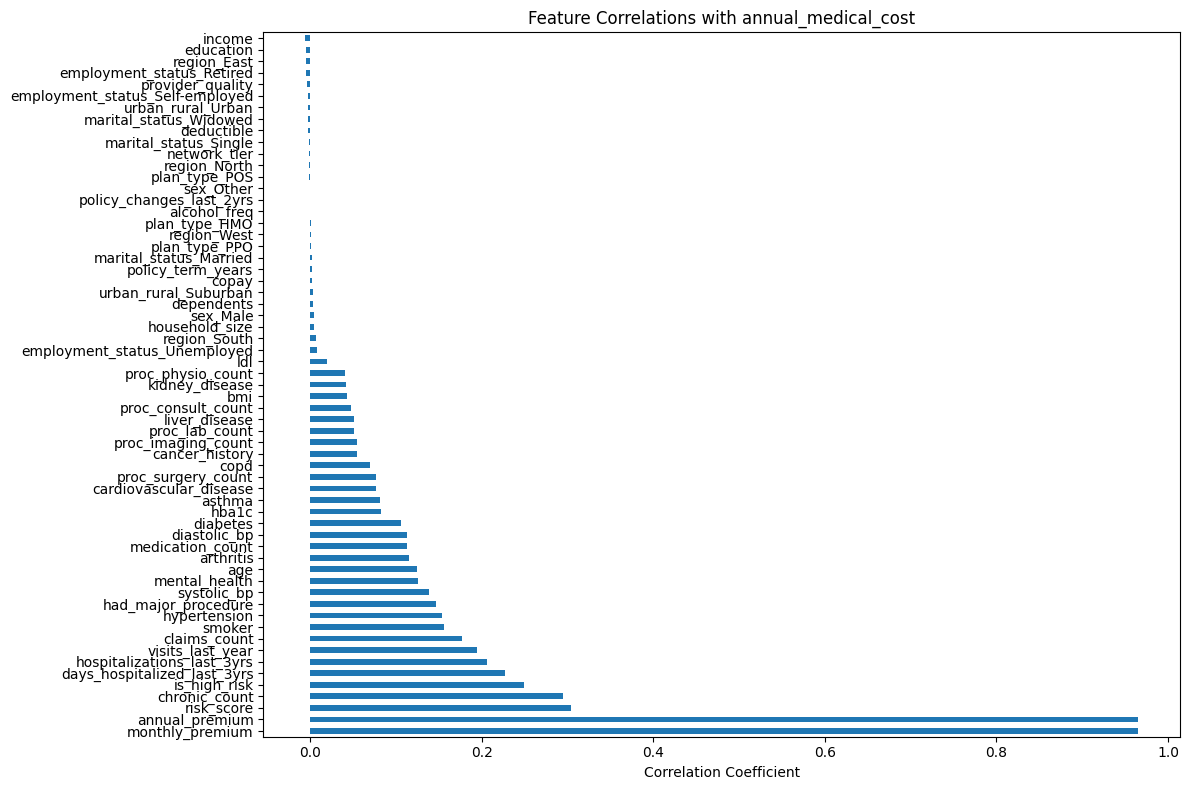

monthly_premium              0.965337
annual_premium               0.965337
risk_score                   0.304500
chronic_count                0.294810
is_high_risk                 0.249887
                               ...   
provider_quality            -0.003952
employment_status_Retired   -0.004191
region_East                 -0.004323
education                   -0.004434
income                      -0.006051
Length: 61, dtype: float64

In [25]:
# Calculate correlation between all features and target variable
correlation_with_target = X.corrwith(y).sort_values(ascending=False)

print("Feature correlations with annual_medical_cost (sorted):")
print(correlation_with_target)

# Plot correlation bar chart
plt.figure(figsize=(12, 8))
correlation_with_target.plot(kind='barh')
plt.title('Feature Correlations with annual_medical_cost')
plt.xlabel('Correlation Coefficient')
plt.tight_layout()
plt.show()
correlation_with_target

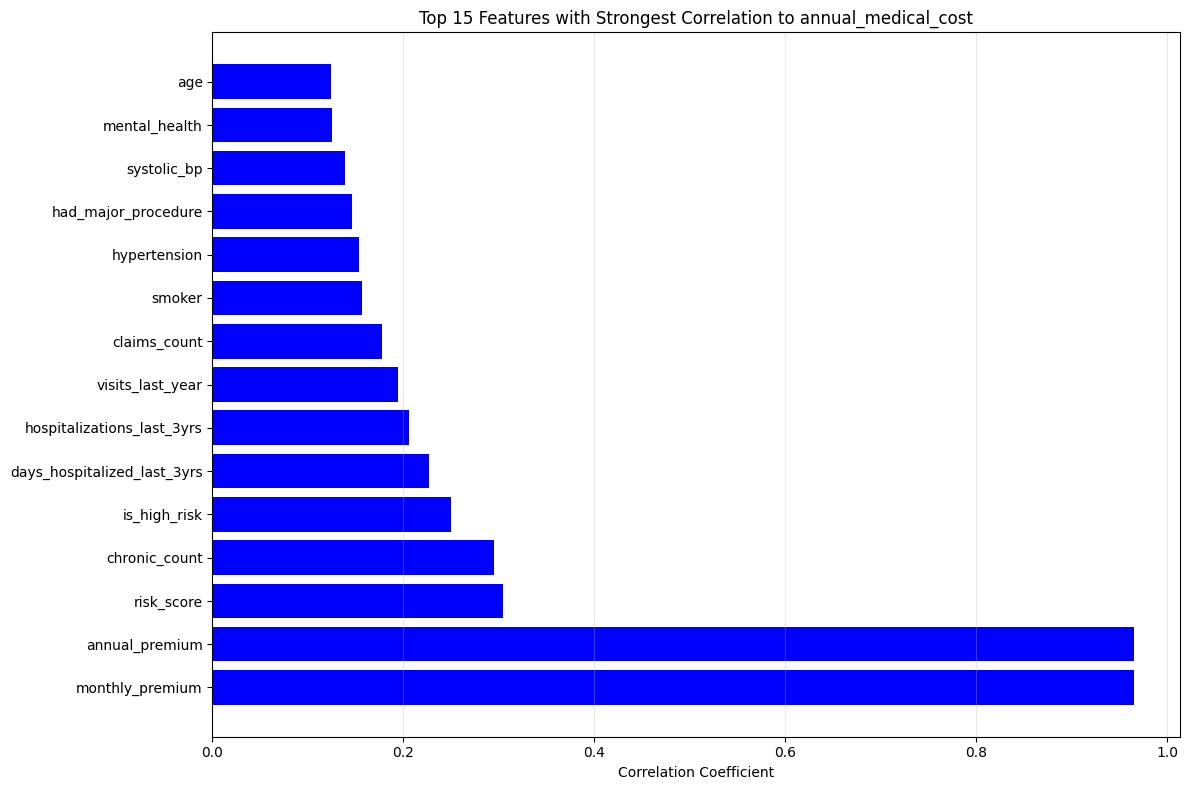

monthly_premium                0.965337
annual_premium                 0.965337
risk_score                     0.304500
chronic_count                  0.294810
is_high_risk                   0.249887
days_hospitalized_last_3yrs    0.227331
hospitalizations_last_3yrs     0.206187
visits_last_year               0.194621
claims_count                   0.177475
smoker                         0.156570
hypertension                   0.153212
had_major_procedure            0.146424
systolic_bp                    0.139085
mental_health                  0.125708
age                            0.124782
dtype: float64

In [26]:
top_features_abs = correlation_with_target.abs().sort_values(ascending=False).head(15)

plt.figure(figsize=(12, 8))
colors = ['red' if x < 0 else 'blue' for x in correlation_with_target[top_features_abs.index]]

plt.barh(range(len(top_features_abs)), correlation_with_target[top_features_abs.index], color=colors)
plt.yticks(range(len(top_features_abs)), top_features_abs.index)
plt.xlabel('Correlation Coefficient')
plt.title('Top 15 Features with Strongest Correlation to annual_medical_cost')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()
top_features_abs

## 使用全部的特征

Regression Models Evaluation of all feature:
Model: Linear Regression
模型在训练集上的评估结果：
R2 Score: 0.9634641878772358
MSE Score: 361767.8083706003
MAE Score: 324.5726006962248

模型在测试集上的评估结果：
R2 Score: 0.9652648183282283
MSE Score: 349127.4849823251
MAE Score: 325.7320218464326
--------------------------------------------------
time: 0.13516974449157715

Model: Ridge Regression
模型在训练集上的评估结果：
R2 Score: 0.9634637287931956
MSE Score: 361772.35409758403
MAE Score: 324.5777772787694

模型在测试集上的评估结果：
R2 Score: 0.9652666888976912
MSE Score: 349108.6836638738
MAE Score: 325.7134331359234
--------------------------------------------------
time: 0.04899764060974121

Model: Decision Tree Regression
模型在训练集上的评估结果：
R2 Score: 1.0
MSE Score: 0.0
MAE Score: 0.0

模型在测试集上的评估结果：
R2 Score: 0.9986197219573388
MSE Score: 13873.340469736366
MAE Score: 9.069591173541594
--------------------------------------------------
time: 1.2992663383483887

Model: Random Forest Regression
模型在训练集上的评估结果：
R2 Score: 0.999708006160217

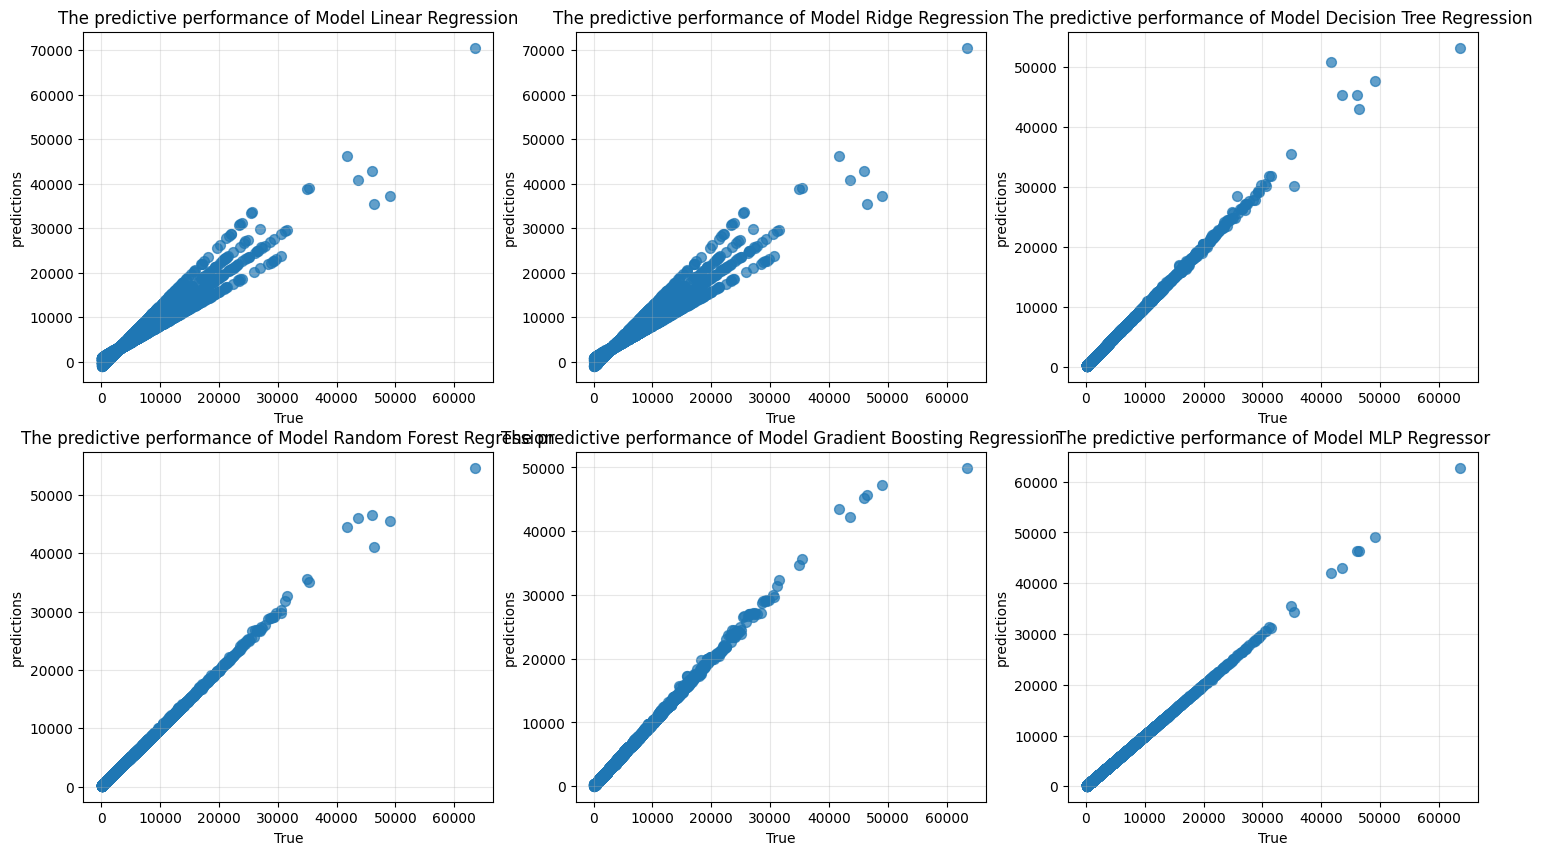

In [27]:
# 准备回归模型
models = {
    "Linear Regression": LinearRegression(), # 线性回归
    "Ridge Regression": Ridge(), # 岭回归
    "Decision Tree Regression": DecisionTreeRegressor(), # 决策树回归 
    "Random Forest Regression": RandomForestRegressor(),  # 随机森林回归
    "Gradient Boosting Regression": GradientBoostingRegressor(),  # 梯度提升回归
    "MLP Regressor": MLPRegressor(hidden_layer_sizes=(50, 25), activation='relu', solver='adam', batch_size=32, max_iter=1000, random_state=42) # 前馈神经网络
}
flag_standard = True # 是否标准化特征

def regression_train(X_train, X_test, models, y_train=y_train, y_test=y_test):
    n_models = len(models)
    n_cols = 3
    n_rows = (n_models + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(6*n_cols, 5*n_rows))
    if n_models == 1:
        axes = np.array([axes])
    axes = axes.flatten()
    
    for idx, (name, model) in  enumerate(models.items()):
        time_start = time.time()
        model.fit(X_train, y_train)
        y_hat = model.predict(X_train)
        r2_score_train = r2_score(y_train, y_hat)
        mse_score_train = mean_squared_error(y_train, y_hat)
        mae_score_train = mean_absolute_error(y_train, y_hat)

        predictions = model.predict(X_test)
        r2_score_model = r2_score(y_test, predictions)
        mse_score = mean_squared_error(y_test, predictions)
        mae_score = mean_absolute_error(y_test, predictions)

        ax = axes[idx]
        ax.scatter(y_test, predictions, alpha=0.7, s=50)       
        ax.set_xlabel('True')
        ax.set_ylabel('predictions')
        ax.set_title(f'The predictive performance of Model {name}')
        ax.grid(True, alpha=0.3)

        print("Model:", name)
        print("模型在训练集上的评估结果：")
        print("R2 Score:", r2_score_train)
        print("MSE Score:", mse_score_train)
        print("MAE Score:", mae_score_train)
        print()
        print("模型在测试集上的评估结果：")
        print("R2 Score:", r2_score_model)
        print("MSE Score:", mse_score)
        print("MAE Score:", mae_score)
        print('-'*50)
        time_end = time.time()
        print(f"time: {time_end - time_start}")
        print()

# 使用全部的特征进行训练并评估模型
print("Regression Models Evaluation of all feature:")
if flag_standard:
    scaler1 = StandardScaler()
    X_train1 = scaler1.fit_transform(X_train)
    X_test1 = scaler1.transform(X_test)
regression_train(X_train=X_train1, X_test=X_test1, models=models)

## 使用部分特征

In [28]:
df1 = data.monthly_premium*12 - data.annual_premium
df1.mean(), df1.std()

(-5.451076587577897e-06, 0.03494334204547763)

monthly_premium 和 annual_premium 是高度相关的特征，因为：

均值接近0（-5.45e-06），说明 monthly_premium * 12 ≈ annual_premium

标准差很小（0.035），说明两者差异很小。

因此只保留其中一个即可，这里选择保留 annual_premium 。

In [29]:
X_train2 = X_train.drop('monthly_premium', axis=1)
X_test2 = X_test.drop('monthly_premium', axis=1)

### 只选取前 10 个重要的特征进行建模
使用Gradient Boosting分析特征的重要性，然后选取前10个最重要的特征进行训练模型并评价模型。

前 10 个重要性特征排序:
                       feature  importance
23              annual_premium    0.942989
16                network_tier    0.056210
17                  deductible    0.000642
15                       hba1c    0.000058
22                  risk_score    0.000022
5                          bmi    0.000019
9   hospitalizations_last_3yrs    0.000015
12                 systolic_bp    0.000015
11            medication_count    0.000007
36          proc_imaging_count    0.000006


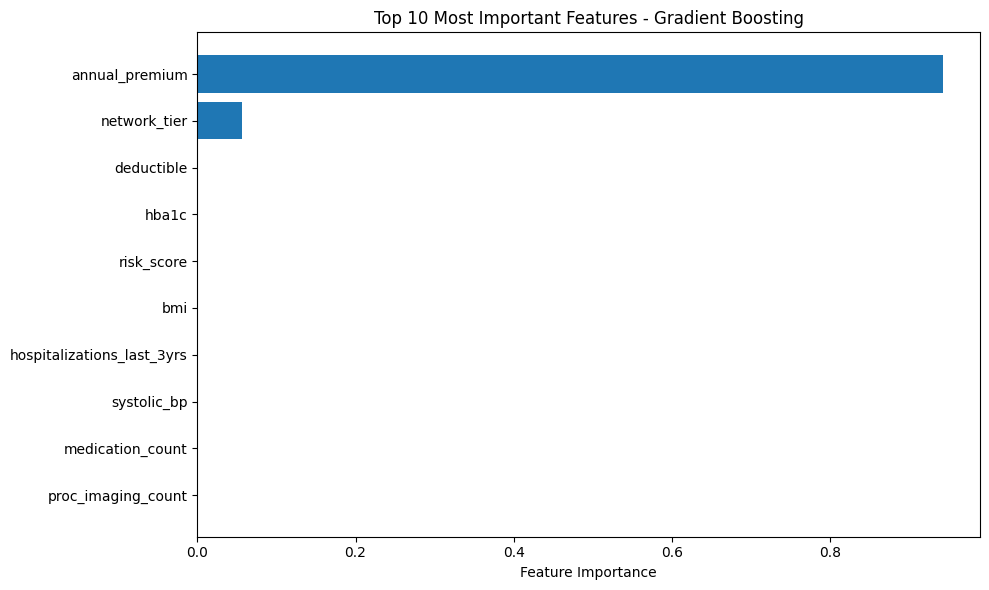

In [30]:
# 使用Gradient Boosting分析特征重要性
if flag_standard:
    scaler1 = StandardScaler()
    # 保存特征名称
    feature_names = X_train2.columns.tolist()
    X_train2 = scaler1.fit_transform(X_train2)
    X_test2 = scaler1.transform(X_test2)
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train2, y_train)

# 获取特征重要性
feature_importance = pd.DataFrame({
    'feature': feature_names,
    'importance': gb_model.feature_importances_
}).sort_values('importance', ascending=False)

print("前 10 个重要性特征排序:")
print(feature_importance.head(10))

# 可视化前10个最重要的特征
plt.figure(figsize=(10, 6))

# 取前10个特征
top_10_features = feature_importance.head(10)

plt.barh(top_10_features['feature'], top_10_features['importance'])
plt.xlabel('Feature Importance')
plt.title('Top 10 Most Important Features - Gradient Boosting')
plt.gca().invert_yaxis()  # 让最重要的特征显示在顶部
plt.tight_layout()
plt.show()

前10个重要特征:
['annual_premium', 'network_tier', 'deductible', 'hba1c', 'risk_score', 'bmi', 'hospitalizations_last_3yrs', 'systolic_bp', 'medication_count', 'proc_imaging_count']

Regression Models Evaluation of some feature:
Model: Linear Regression
模型在训练集上的评估结果：
R2 Score: 0.9633863766144263
MSE Score: 362538.2746166643
MAE Score: 324.56074412878075

模型在测试集上的评估结果：
R2 Score: 0.9651895900067472
MSE Score: 349883.61388144287
MAE Score: 325.6868792672646
--------------------------------------------------
time: 0.027748823165893555

Model: Ridge Regression
模型在训练集上的评估结果：
R2 Score: 0.9633863763968771
MSE Score: 362538.27677077847
MAE Score: 324.5657811197255

模型在测试集上的评估结果：
R2 Score: 0.9651894253828935
MSE Score: 349885.2685355783
MAE Score: 325.69219077162285
--------------------------------------------------
time: 0.004476785659790039

Model: Decision Tree Regression
模型在训练集上的评估结果：
R2 Score: 1.0
MSE Score: 0.0
MAE Score: 0.0

模型在测试集上的评估结果：
R2 Score: 0.9974538491352456
MSE Score: 25591.668303254

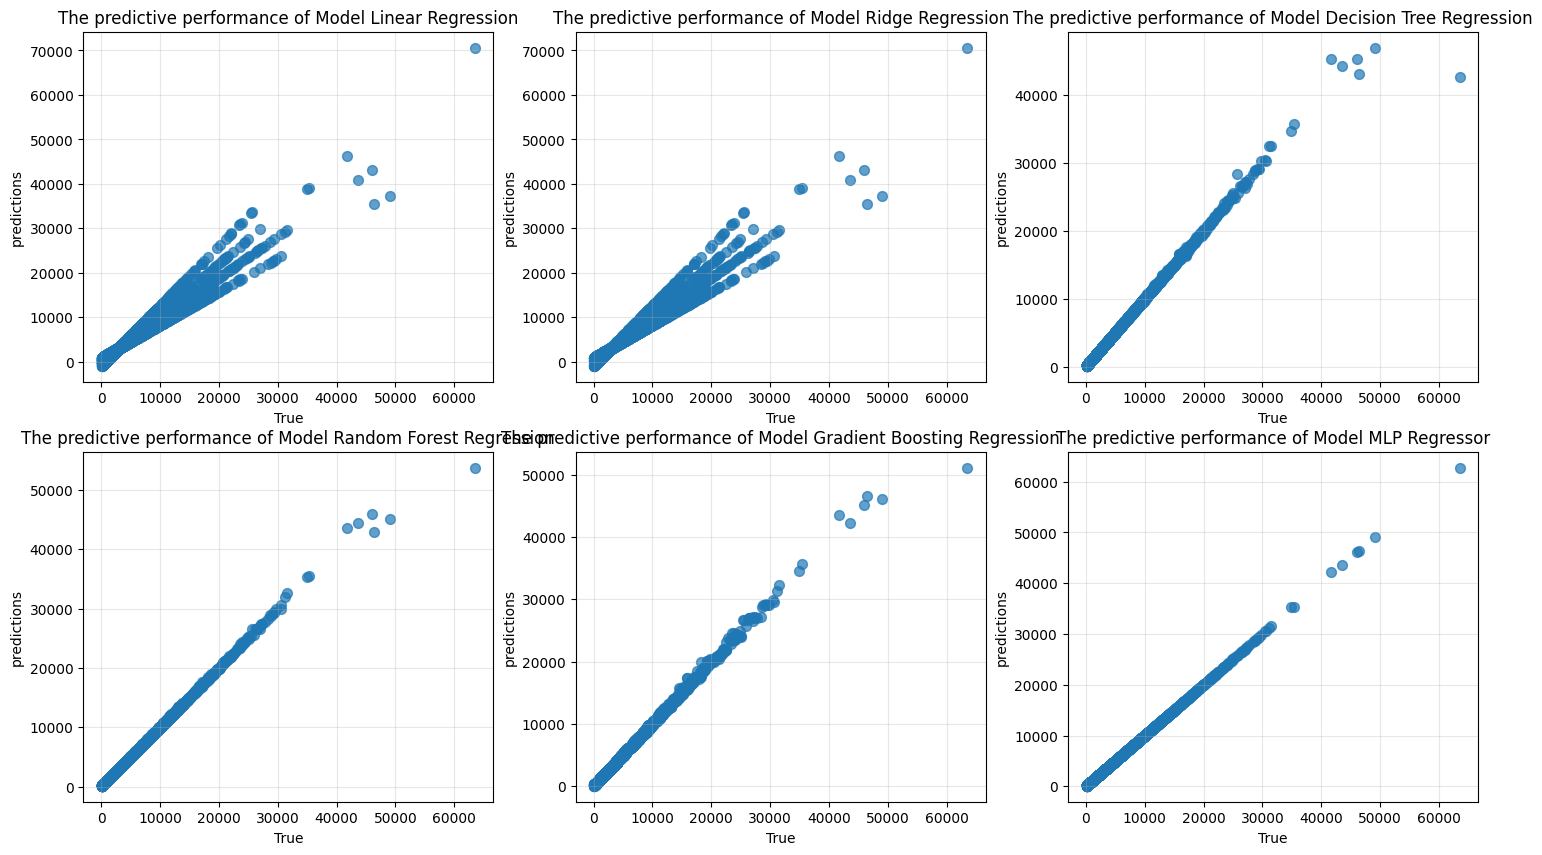

In [31]:
# 获取前10个特征名称
top_10_feature_names = feature_importance.head(10)['feature'].tolist()
print("前10个重要特征:", top_10_feature_names, sep='\n')

# 创建只包含前10个特征的数据集
X_train_top10 = X_train[top_10_feature_names]
X_test_top10 = X_test[top_10_feature_names]  
if flag_standard:
    scaler1 = StandardScaler()
    X_train_top10 = scaler1.fit_transform(X_train_top10)
    X_test_top10 = scaler1.transform(X_test_top10)
# 使用部分的特征进行训练并评估模型
print("\nRegression Models Evaluation of some feature:")
if flag_standard:
    scaler2 = StandardScaler()
    X_train_top10 = scaler2.fit_transform(X_train_top10)
    X_test_top10 = scaler2.transform(X_test_top10)
regression_train(X_train=X_train_top10, X_test=X_test_top10, models=models)


### 只使用 annual_premium 特征


Regression Models Evaluation just of annual_premium feature:
Model: Linear Regression
模型在训练集上的评估结果：
R2 Score: 0.9314471943260172
MSE Score: 678791.4877326679
MAE Score: 478.78345307370734

模型在测试集上的评估结果：
R2 Score: 0.9335450686075611
MSE Score: 667946.5010707037
MAE Score: 480.67582197291466
--------------------------------------------------
time: 0.00491642951965332

Model: Ridge Regression
模型在训练集上的评估结果：
R2 Score: 0.9314471941660882
MSE Score: 678791.4893162412
MAE Score: 478.78890557908784

模型在测试集上的评估结果：
R2 Score: 0.9335448589616716
MSE Score: 667948.6082467322
MAE Score: 480.68171824140336
--------------------------------------------------
time: 0.010102272033691406

Model: Decision Tree Regression
模型在训练集上的评估结果：
R2 Score: 0.9930311924054206
MSE Score: 69003.26293490457
MAE Score: 139.8969575071008

模型在测试集上的评估结果：
R2 Score: 0.8722071437106358
MSE Score: 1284461.3549631038
MAE Score: 613.8803361566364
--------------------------------------------------
time: 0.22150468826293945

Model: R

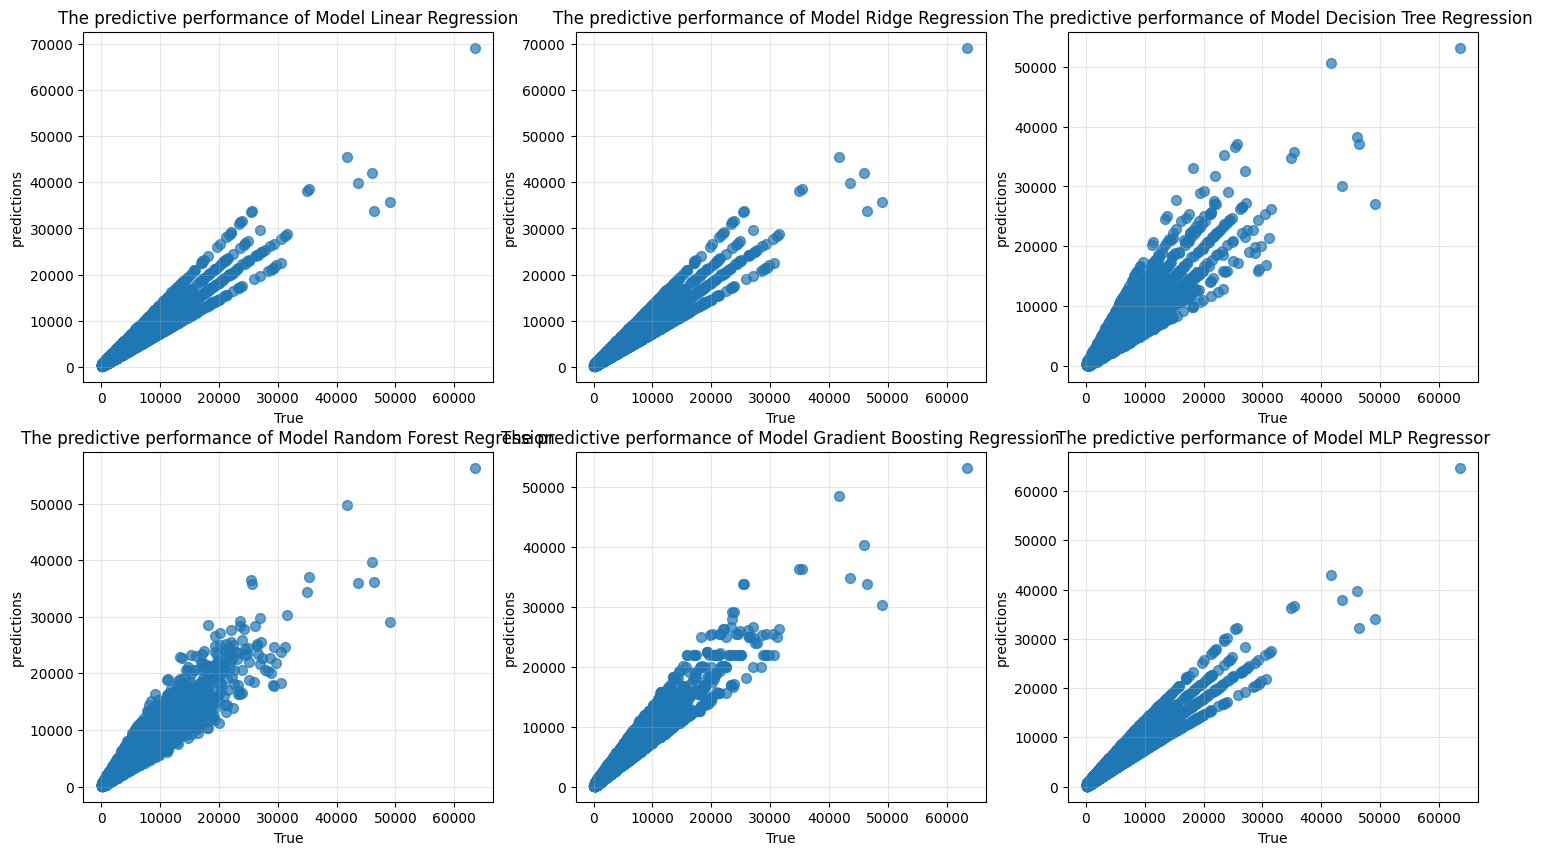

In [32]:
# 只取 annual_premium 特征
X_train_annual_premium = X_train[['annual_premium']]
X_test_annual_premium = X_test[['annual_premium']]

if flag_standard:
    scaler1 = StandardScaler()
    X_train_annual_premium = scaler1.fit_transform(X_train_annual_premium)
    X_test_annual_premium = scaler1.transform(X_test_annual_premium)

# 只使用 annual_premium 特征进行训练并评估模型
print("\nRegression Models Evaluation just of annual_premium feature:")
if flag_standard:
    scaler3 = StandardScaler()
    X_train_annual_premium = scaler3.fit_transform(X_train_annual_premium)
    X_test_annual_premium = scaler3.transform(X_test_annual_premium)
regression_train(X_train=X_train_annual_premium, X_test=X_test_annual_premium, models=models)